<a href="https://colab.research.google.com/github/badaru-musa/Aspect_based_sentiment_Analysis_Twitter_Data/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install -U pyabsa
#!pip install getoldtweets3
#!pip install aspect-based-sentiment-analysis
#!pip install ast

In [ ]:
# import locale
# def getpreferredencoding(do_setlocale = True):
#     return "UTF-8"
# locale.getpreferredencoding = getpreferredencoding
# !pip install datasets

In [ ]:

import tweepy
import configparser
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob

from wordcloud import WordCloud,STOPWORDS

import re

import spacy
from tqdm import tqdm
spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_lg')

# import aspect_based_sentiment_analysis as absa
# import ast
# nlp = absa.load()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:

# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [ ]:
# search tweets
keywords = '@santanderuk'
limit=3000


tweets = tweepy.Cursor(api.search_tweets, q=keywords, since_id=2020-6-12, count=100, tweet_mode='extended', lang='en').items(limit)

# tweets = api.user_timeline(screen_name=user, count=limit, tweet_mode='extended')

# create DataFrame
columns = ['id', 'tweet', 'date', 'reply']
data = []

for tweet in tweets:
    data.append([tweet.id, tweet.full_text, tweet.created_at, tweet.in_reply_to_user_id])

df = pd.DataFrame(data, columns=columns)

proccessed_tweets = df

In [ ]:
# print(sum(df.reply.isna()))
# proccessed_tweets = df.drop_duplicates(subset='tweet')
# proccessed_tweets = df[df.reply.isna()].reset_index(drop=True)
# proccessed_tweets

In [ ]:
tweet_tokenizer = TweetTokenizer()
tweet_token = [tweet_tokenizer.tokenize(sent) for sent in proccessed_tweets.tweet]

# precprcess tweet

tweet_sentence = []
for tweet in tweet_token:
    tweet_words = []
    for word in tweet:
        if word.startswith('@') and len(word) > 1:
            word = '@user'

        elif word.startswith('http'):
            word = "http"
        tweet_words.append(word)
    tweet_proc = " ".join(tweet_words)
    tweet_sentence.append(tweet_proc)

proccessed_tweets['clean_tweet'] = tweet_sentence

tweet_sentence = []
for tweet in tweet_token:
    tweet_words = []
    for word in tweet:
        if word.startswith('@') and len(word) > 1:
            word = ''
        elif word.startswith('http'):
            word = ""
        elif word.startswith('#'):
            word = ""
        elif word.startswith(':'):
            word = ""
        elif word.startswith('RT'):
            word = ""
        tweet_words.append(word)
    tweet_proc = " ".join(tweet_words)
    tweet_proc.strip()
    tweet_sentence.append(tweet_proc)

proccessed_tweets['cleaner_tweet'] = [tweet.lower().strip() for tweet in tweet_sentence]
proccessed_tweets

,id,tweet,date,reply,clean_tweet,cleaner_tweet
0,1642803428349845504,Hello @santanderuk \nManage my mortgage is out...,2023-04-03 08:17:13+00:00,NaN,Hello @user Manage my mortgage is out of actio...,hello manage my mortgage is out of action for...
1,1642617674793353218,RT @andyd790: CUSTOMER BEWARE -your @santander...,2023-04-02 19:59:06+00:00,NaN,RT @user : CUSTOMER BEWARE - your @user credit...,customer beware - your credit card statements...
2,1642572114757599232,@SmartMoneyPPL Getting @santanderuk (amongst o...,2023-04-02 16:58:04+00:00,2.274537e+09,@user Getting @user ( amongst others ) to do a...,getting ( amongst others ) to do a decent reg...
3,1642557632102780929,@Simlea15 @RajMalh29050501 @JasonHen66 @MrDHus...,2023-04-02 16:00:31+00:00,3.369007e+09,@user @user @user @user @user @user I put fuel...,i put fuel in on tuesday . £ 120 and took the...
4,1642503894101028868,"Seriously, what’s the point of banks like @san...",2023-04-02 12:26:59+00:00,NaN,"Seriously , what ’ s the point of banks like @...","seriously , what ’ s the point of banks like ..."
...,...,...,...,...,...,...
261,1639599780375711744,RT @alzheimerssoc: Our #DementiaHeroAward for ...,2023-03-25 12:07:04+00:00,NaN,RT @user : Our #DementiaHeroAward for Dementia...,our for dementia friendly business ( large ) ...
262,1639599270742597632,Our #DementiaHeroAward for Dementia Friendly B...,2023-03-25 12:05:03+00:00,NaN,Our #DementiaHeroAward for Dementia Friendly B...,our for dementia friendly business ( large ) ...
263,1639597320869117954,Sign the open letter to help @MMMoneyMatter ge...,2023-03-25 11:57:18+00:00,NaN,Sign the open letter to help @user get the big...,sign the open letter to help get the big five...
264,1639591042361040898,Sign the open letter to help @MMMoneyMatter ge...,2023-03-25 11:32:21+00:00,NaN,Sign the open letter to help @user get the big...,sign the open letter to help get the big five...


In [ ]:
sent = [TextBlob(text).sentiment.polarity for text in proccessed_tweets.cleaner_tweet]
sub = [TextBlob(text).sentiment.subjectivity for text in proccessed_tweets.cleaner_tweet]
proccessed_tweets['tweet_sentiment_score'] = sent
proccessed_tweets['tweet_subjectivity'] = sub
def getAnalysis(score):
  if score < -0.5:
    return 'Very Negative'
  elif score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  elif score < 0.5:
    return 'Positive'
  else:
    return 'Very Positive'
proccessed_tweets['tweet_sentiment'] = proccessed_tweets['tweet_sentiment_score'].apply(getAnalysis)
proccessed_tweets

,id,tweet,date,reply,clean_tweet,cleaner_tweet,tweet_sentiment_score,tweet_subjectivity,tweet_sentiment
0,1642803428349845504,Hello @santanderuk \nManage my mortgage is out...,2023-04-03 08:17:13+00:00,NaN,Hello @user Manage my mortgage is out of actio...,hello manage my mortgage is out of action for...,0.100000,0.100000,Positive
1,1642617674793353218,RT @andyd790: CUSTOMER BEWARE -your @santander...,2023-04-02 19:59:06+00:00,NaN,RT @user : CUSTOMER BEWARE - your @user credit...,customer beware - your credit card statements...,0.000000,0.000000,Neutral
2,1642572114757599232,@SmartMoneyPPL Getting @santanderuk (amongst o...,2023-04-02 16:58:04+00:00,2.274537e+09,@user Getting @user ( amongst others ) to do a...,getting ( amongst others ) to do a decent reg...,0.083333,0.371795,Positive
3,1642557632102780929,@Simlea15 @RajMalh29050501 @JasonHen66 @MrDHus...,2023-04-02 16:00:31+00:00,3.369007e+09,@user @user @user @user @user @user I put fuel...,i put fuel in on tuesday . £ 120 and took the...,0.000000,0.656250,Neutral
4,1642503894101028868,"Seriously, what’s the point of banks like @san...",2023-04-02 12:26:59+00:00,NaN,"Seriously , what ’ s the point of banks like @...","seriously , what ’ s the point of banks like ...",0.013651,0.592698,Positive
...,...,...,...,...,...,...,...,...,...
261,1639599780375711744,RT @alzheimerssoc: Our #DementiaHeroAward for ...,2023-03-25 12:07:04+00:00,NaN,RT @user : Our #DementiaHeroAward for Dementia...,our for dementia friendly business ( large ) ...,0.294643,0.464286,Positive
262,1639599270742597632,Our #DementiaHeroAward for Dementia Friendly B...,2023-03-25 12:05:03+00:00,NaN,Our #DementiaHeroAward for Dementia Friendly B...,our for dementia friendly business ( large ) ...,0.366071,0.482143,Positive
263,1639597320869117954,Sign the open letter to help @MMMoneyMatter ge...,2023-03-25 11:57:18+00:00,NaN,Sign the open letter to help @user get the big...,sign the open letter to help get the big five...,0.053333,0.380000,Positive
264,1639591042361040898,Sign the open letter to help @MMMoneyMatter ge...,2023-03-25 11:32:21+00:00,NaN,Sign the open letter to help @user get the big...,sign the open letter to help get the big five...,0.053333,0.380000,Positive


In [ ]:
proccessed_tweets.value_counts('tweet_sentiment')

tweet_sentiment
Positive         114
Neutral           68
Very Positive     41
Negative          38
Very Negative      5
dtype: int64

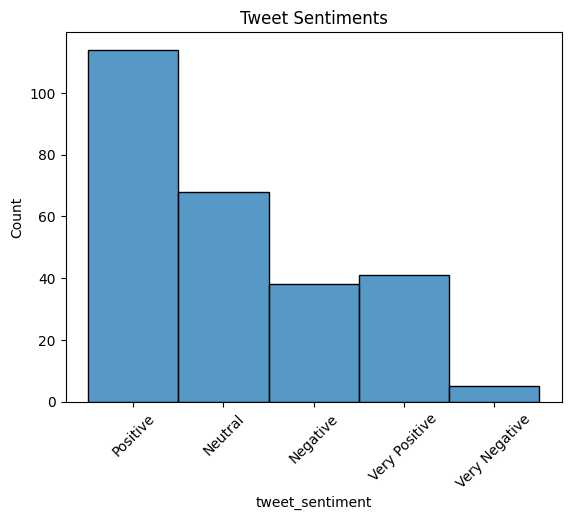

In [ ]:
sns.histplot(proccessed_tweets.tweet_sentiment)
plt.title("Tweet Sentiments")
plt.xticks(rotation=45)
plt.show()

In [ ]:
proccessed_tweets.sort_values('tweet_sentiment_score')

,id,tweet,date,reply,clean_tweet,cleaner_tweet,tweet_sentiment_score,tweet_subjectivity,tweet_sentiment
224,1639901063510650882,@StuartJones7 @santanderuk Don’t get HSBC thei...,2023-03-26 08:04:16+00:00,3.218730e+08,@user @user Don ’ t get HSBC their customer se...,don ’ t get hsbc their customer service is awful,-1.000,1.000000,Very Negative
38,1641766405581176832,@santanderuk please tell me you are eventually...,2023-03-31 11:36:28+00:00,4.266406e+07,@user please tell me you are eventually going ...,please tell me you are eventually going to cha...,-1.000,1.000000,Very Negative
199,1640153249498947586,@AllyALaw @StuartJones7 @santanderuk what’s ba...,2023-03-27 00:46:21+00:00,3.003068e+09,@user @user @user what ’ s bad about barclays ...,what ’ s bad about barclays just asking,-0.700,0.666667,Very Negative
48,1641712592371560448,@santanderuk Why can’t I pay my credit card on...,2023-03-31 08:02:38+00:00,4.266406e+07,@user Why can ’ t I pay my credit card online ...,why can ’ t i pay my credit card online ? it i...,-0.625,0.900000,Very Negative
85,1641385338743541760,"as usual, just awful customer service from @sa...",2023-03-30 10:22:14+00:00,NaN,"as usual , just awful customer service from @u...","as usual , just awful customer service from t...",-0.625,0.625000,Very Negative
...,...,...,...,...,...,...,...,...,...
51,1641704378850476032,@HelpForMovers @santanderuk That's amazing!,2023-03-31 07:29:59+00:00,4.209331e+09,@user @user That's amazing !,that's amazing !,0.750,0.900000,Very Positive
156,1640639323287568386,"With Salesforce, we’re reimagining how we unde...",2023-03-28 08:57:50+00:00,NaN,"With Salesforce , we ’ re reimagining how we u...","with salesforce , we ’ re reimagining how we u...",0.800,0.750000,Very Positive
162,1640477550466957315,We are delighted to announce the winners of ou...,2023-03-27 22:15:01+00:00,NaN,We are delighted to announce the winners of ou...,we are delighted to announce the winners of ou...,0.875,0.700000,Very Positive
243,1639677247651971073,@StuartJones7 @santanderuk Stay away from Barc...,2023-03-25 17:14:54+00:00,3.218730e+08,@user @user Stay away from Barclays . Monzo / ...,stay away from barclays . monzo / revolut been...,1.000,0.300000,Very Positive


In [ ]:
proccessed_tweets = proccessed_tweets.drop(proccessed_tweets[(proccessed_tweets['tweet_sentiment'] == 'Positive')&(proccessed_tweets['tweet_subjectivity'] < 0.255)].index)
proccessed_tweets

,id,tweet,date,reply,clean_tweet,cleaner_tweet,tweet_sentiment_score,tweet_subjectivity,tweet_sentiment
1,1642617674793353218,RT @andyd790: CUSTOMER BEWARE -your @santander...,2023-04-02 19:59:06+00:00,NaN,RT @user : CUSTOMER BEWARE - your @user credit...,customer beware - your credit card statements...,0.000000,0.000000,Neutral
2,1642572114757599232,@SmartMoneyPPL Getting @santanderuk (amongst o...,2023-04-02 16:58:04+00:00,2.274537e+09,@user Getting @user ( amongst others ) to do a...,getting ( amongst others ) to do a decent reg...,0.083333,0.371795,Positive
3,1642557632102780929,@Simlea15 @RajMalh29050501 @JasonHen66 @MrDHus...,2023-04-02 16:00:31+00:00,3.369007e+09,@user @user @user @user @user @user I put fuel...,i put fuel in on tuesday . £ 120 and took the...,0.000000,0.656250,Neutral
4,1642503894101028868,"Seriously, what’s the point of banks like @san...",2023-04-02 12:26:59+00:00,NaN,"Seriously , what ’ s the point of banks like @...","seriously , what ’ s the point of banks like ...",0.013651,0.592698,Positive
5,1642488260327886852,@santanderuk I found a card from one of your c...,2023-04-02 11:24:51+00:00,4.266406e+07,@user I found a card from one of your customer...,i found a card from one of your customers on t...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...
261,1639599780375711744,RT @alzheimerssoc: Our #DementiaHeroAward for ...,2023-03-25 12:07:04+00:00,NaN,RT @user : Our #DementiaHeroAward for Dementia...,our for dementia friendly business ( large ) ...,0.294643,0.464286,Positive
262,1639599270742597632,Our #DementiaHeroAward for Dementia Friendly B...,2023-03-25 12:05:03+00:00,NaN,Our #DementiaHeroAward for Dementia Friendly B...,our for dementia friendly business ( large ) ...,0.366071,0.482143,Positive
263,1639597320869117954,Sign the open letter to help @MMMoneyMatter ge...,2023-03-25 11:57:18+00:00,NaN,Sign the open letter to help @user get the big...,sign the open letter to help get the big five...,0.053333,0.380000,Positive
264,1639591042361040898,Sign the open letter to help @MMMoneyMatter ge...,2023-03-25 11:32:21+00:00,NaN,Sign the open letter to help @user get the big...,sign the open letter to help get the big five...,0.053333,0.380000,Positive


In [ ]:
proccessed_tweets[proccessed_tweets['tweet_subjectivity'] < 0.3].value_counts('tweet_sentiment_score')

tweet_sentiment_score
 0.000000    54
-0.100000     2
-0.050000     2
-0.071429     1
-0.060000     1
-0.054167     1
 0.016667     1
 0.043182     1
 0.090341     1
 0.132143     1
 0.150000     1
 0.325000     1
dtype: int64

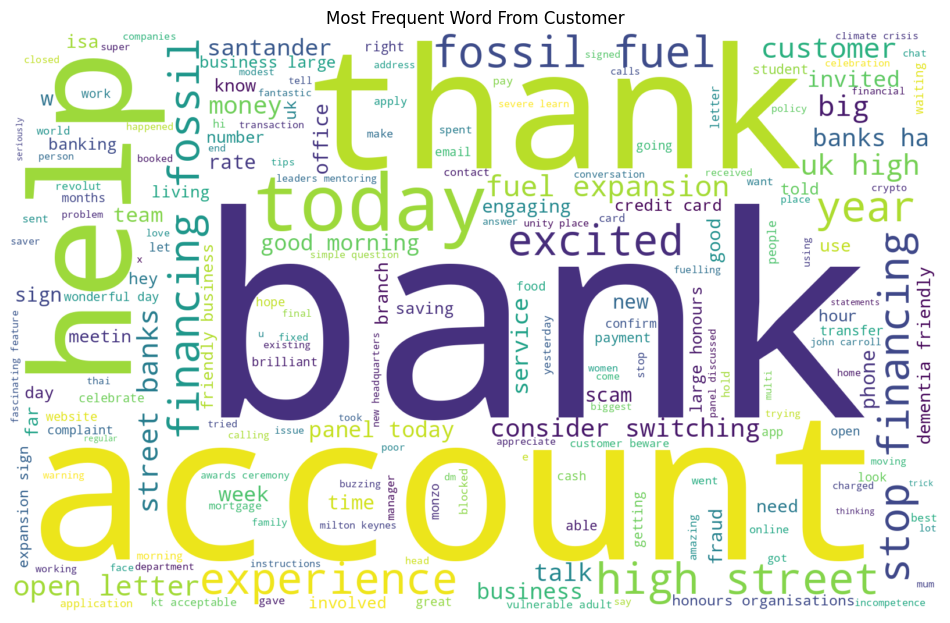

In [ ]:
stopword = set(STOPWORDS).union(set(ENGLISH_STOP_WORDS)).union(set(stopwords.words('english')))
wordcloud=WordCloud(width=1600, height=1000, background_color='white', stopwords=stopword).generate(' '.join(proccessed_tweets.cleaner_tweet.tolist()))
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Word From Customer")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['let'] not in stop_words.
  warnings.warn(


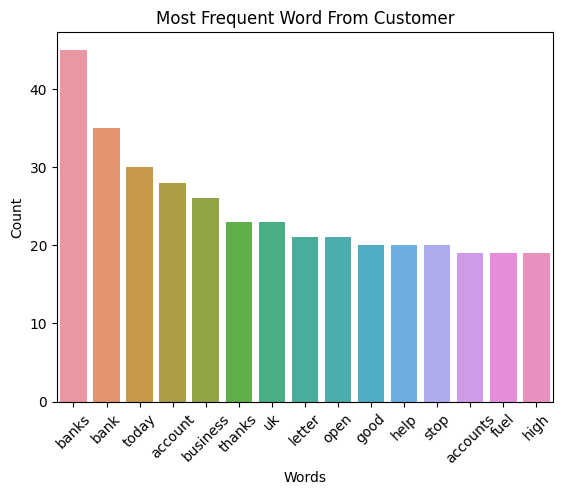

In [ ]:
vectorizer = CountVectorizer(stop_words=list(stopword))
bag_of_words = vectorizer.fit_transform(proccessed_tweets.cleaner_tweet.tolist())
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_sum = bow_df.sum(axis=0).transpose()
top_words = word_sum.nlargest(15)
top_words.index
sns.barplot(x=top_words.index,y=top_words)
plt.xlabel("Words")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Most Frequent Word From Customer")
plt.show()

In [ ]:
proccessed_tweets=proccessed_tweets.reset_index(drop=True)

In [ ]:
aspect_terms = []
comp_terms = []
easpect_terms = []
ecomp_terms = []
enemy = []
for x in tqdm(range(len(proccessed_tweets['cleaner_tweet']))):
    amod_pairs = []
    advmod_pairs = []
    compound_pairs = []
    xcomp_pairs = []
    neg_pairs = []
    eamod_pairs = []
    eadvmod_pairs = []
    ecompound_pairs = []
    eneg_pairs = []
    excomp_pairs = []
    enemlist = []
    if len(str(proccessed_tweets['cleaner_tweet'].iloc[[x]])) > 0:
        lines = str(proccessed_tweets['cleaner_tweet'].iloc[[x]]).replace('*',' ').replace('-',' ').replace('so ',' ').replace('be ',' ').replace('are ',' ').replace('just ',' ').replace('get ','').replace('were ',' ').replace('When ','').replace('when ','').replace('again ',' ').replace('where ','').replace('how ',' ').replace('has ',' ').replace('Here ',' ').replace('here ',' ').replace('now ',' ').replace('see ',' ').replace('why ',' ').split('.')
        for line in lines:
            enem_list = []
            if len(enem_list)==0:
                doc = nlp(line)
                str1=''
                str2=''
                for token in doc:
                    if token.pos_ == 'NOUN':
                        for j in token.lefts:
                            if j.dep_ == 'compound':
                                compound_pairs.append((j.text+' '+token.text,token.text))
                            if j.dep_ is 'amod' and j.pos_ is 'ADJ': #primary condition
                                str1 = j.text+' '+token.text
                                amod_pairs.append(j.text+' '+token.text)
                                for k in j.lefts:
                                    if k.dep_ is 'advmod': #secondary condition to get adjective of adjectives
                                        str2 = k.text+' '+j.text+' '+token.text
                                        amod_pairs.append(k.text+' '+j.text+' '+token.text)
                                mtch = re.search(re.escape(str1),re.escape(str2))
                                if mtch is not None:
                                    amod_pairs.remove(str1)
                    if token.pos_ is 'VERB':
                        for j in token.lefts:
                            if j.dep_ is 'advmod' and j.pos_ is 'ADV':
                                advmod_pairs.append(j.text+' '+token.text)
                            if j.dep_ is 'neg' and j.pos_ is 'ADV':
                                neg_pairs.append(j.text+' '+token.text)
                        for j in token.rights:
                            if j.dep_ is 'advmod'and j.pos_ is 'ADV':
                                advmod_pairs.append(token.text+' '+j.text)
                    if token.pos_ is 'ADJ':
                        for j,h in zip(token.rights,token.lefts):
                            if j.dep_ is 'xcomp' and h.dep_ is not 'neg':
                                for k in j.lefts:
                                    if k.dep_ is 'aux':
                                        xcomp_pairs.append(token.text+' '+k.text+' '+j.text)
                            elif j.dep_ is 'xcomp' and h.dep_ is 'neg':
                                if k.dep_ is 'aux':
                                        neg_pairs.append(h.text +' '+token.text+' '+k.text+' '+j.text)

            else:
                enemlist.append(enem_list)
                doc = nlp(line)
                str1=''
                str2=''
                for token in doc:
                    if token.pos_ is 'NOUN':
                        for j in token.lefts:
                            if j.dep_ == 'compound':
                                ecompound_pairs.append((j.text+' '+token.text,token.text))
                            if j.dep_ is 'amod' and j.pos_ is 'ADJ': #primary condition
                                str1 = j.text+' '+token.text
                                eamod_pairs.append(j.text+' '+token.text)
                                for k in j.lefts:
                                    if k.dep_ is 'advmod': #secondary condition to get adjective of adjectives
                                        str2 = k.text+' '+j.text+' '+token.text
                                        eamod_pairs.append(k.text+' '+j.text+' '+token.text)
                                mtch = re.search(re.escape(str1),re.escape(str2))
                                if mtch is not None:
                                    eamod_pairs.remove(str1)
                    if token.pos_ is 'VERB':
                        for j in token.lefts:
                            if j.dep_ is 'advmod' and j.pos_ is 'ADV':
                                eadvmod_pairs.append(j.text+' '+token.text)
                            if j.dep_ is 'neg' and j.pos_ is 'ADV':
                                eneg_pairs.append(j.text+' '+token.text)
                        for j in token.rights:
                            if j.dep_ is 'advmod'and j.pos_ is 'ADV':
                                eadvmod_pairs.append(token.text+' '+j.text)
                    if token.pos_ is 'ADJ':
                        for j in token.rights:
                            if j.dep_ is 'xcomp':
                                for k in j.lefts:
                                    if k.dep_ is 'aux':
                                        excomp_pairs.append(token.text+' '+k.text+' '+j.text)
        pairs = list(set(amod_pairs+advmod_pairs+neg_pairs+xcomp_pairs))
        epairs = list(set(eamod_pairs+eadvmod_pairs+eneg_pairs+excomp_pairs))
        for i in range(len(pairs)):
            if len(compound_pairs)!=0:
                for comp in compound_pairs:
                    mtch = re.search(re.escape(comp[1]),re.escape(pairs[i]))
                    if mtch is not None:
                        pairs[i] = pairs[i].replace(mtch.group(),comp[0])
        for i in range(len(epairs)):
            if len(ecompound_pairs)!=0:
                for comp in ecompound_pairs:
                    mtch = re.search(re.escape(comp[1]),re.escape(epairs[i]))
                    if mtch is not None:
                        epairs[i] = epairs[i].replace(mtch.group(),comp[0])

    aspect_terms.append(pairs)
    comp_terms.append(compound_pairs)
    easpect_terms.append(epairs)
    ecomp_terms.append(ecompound_pairs)
    enemy.append(enemlist)
proccessed_tweets['compound_nouns'] = comp_terms
proccessed_tweets['aspect_keywords'] = aspect_terms
proccessed_tweets

<>:31: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:31: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:35: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:41: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:43: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:43: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:45: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:45: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:48: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:48: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:50: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:52: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:52: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:54: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:56: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:56: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5

,id,tweet,date,reply,clean_tweet,cleaner_tweet,tweet_sentiment_score,tweet_subjectivity,tweet_sentiment,compound_nouns,aspect_keywords
0,1642617674793353218,RT @andyd790: CUSTOMER BEWARE -your @santander...,2023-04-02 19:59:06+00:00,NaN,RT @user : CUSTOMER BEWARE - your @user credit...,customer beware - your credit card statements...,0.000000,0.000000,Neutral,"[(credit card, card), (card statements, statem...",[]
1,1642572114757599232,@SmartMoneyPPL Getting @santanderuk (amongst o...,2023-04-02 16:58:04+00:00,2.274537e+09,@user Getting @user ( amongst others ) to do a...,getting ( amongst others ) to do a decent reg...,0.083333,0.371795,Positive,[],[]
2,1642557632102780929,@Simlea15 @RajMalh29050501 @JasonHen66 @MrDHus...,2023-04-02 16:00:31+00:00,3.369007e+09,@user @user @user @user @user @user I put fuel...,i put fuel in on tuesday . £ 120 and took the...,0.000000,0.656250,Neutral,[],[]
3,1642503894101028868,"Seriously, what’s the point of banks like @san...",2023-04-02 12:26:59+00:00,NaN,"Seriously , what ’ s the point of banks like @...","seriously , what ’ s the point of banks like ...",0.013651,0.592698,Positive,[],[]
4,1642488260327886852,@santanderuk I found a card from one of your c...,2023-04-02 11:24:51+00:00,4.266406e+07,@user I found a card from one of your customer...,i found a card from one of your customers on t...,0.000000,0.000000,Neutral,[],[]
...,...,...,...,...,...,...,...,...,...,...,...
246,1639599780375711744,RT @alzheimerssoc: Our #DementiaHeroAward for ...,2023-03-25 12:07:04+00:00,NaN,RT @user : Our #DementiaHeroAward for Dementia...,our for dementia friendly business ( large ) ...,0.294643,0.464286,Positive,[],[friendly business]
247,1639599270742597632,Our #DementiaHeroAward for Dementia Friendly B...,2023-03-25 12:05:03+00:00,NaN,Our #DementiaHeroAward for Dementia Friendly B...,our for dementia friendly business ( large ) ...,0.366071,0.482143,Positive,[],[friendly business]
248,1639597320869117954,Sign the open letter to help @MMMoneyMatter ge...,2023-03-25 11:57:18+00:00,NaN,Sign the open letter to help @user get the big...,sign the open letter to help get the big five...,0.053333,0.380000,Positive,[],[open letter]
249,1639591042361040898,Sign the open letter to help @MMMoneyMatter ge...,2023-03-25 11:32:21+00:00,NaN,Sign the open letter to help @user get the big...,sign the open letter to help get the big five...,0.053333,0.380000,Positive,[],[open letter]


In [ ]:
def pos(text):
    doc = nlp(text)
    # You want list of Verb tokens
    aspects = [token.text for token in doc if token.pos_ == "NOUN"]
    return aspects

In [ ]:
proccessed_tweets["Aspects"] = proccessed_tweets["cleaner_tweet"].apply(pos)
proccessed_tweets

,id,tweet,date,reply,clean_tweet,cleaner_tweet,tweet_sentiment_score,tweet_subjectivity,tweet_sentiment,compound_nouns,aspect_keywords,Aspects
0,1642617674793353218,RT @andyd790: CUSTOMER BEWARE -your @santander...,2023-04-02 19:59:06+00:00,NaN,RT @user : CUSTOMER BEWARE - your @user credit...,customer beware - your credit card statements...,0.000000,0.000000,Neutral,"[(credit card, card), (card statements, statem...",[],"[customer, credit, card, statements, t, custom..."
1,1642572114757599232,@SmartMoneyPPL Getting @santanderuk (amongst o...,2023-04-02 16:58:04+00:00,2.274537e+09,@user Getting @user ( amongst others ) to do a...,getting ( amongst others ) to do a decent reg...,0.083333,0.371795,Positive,[],[],"[others, savings, product]"
2,1642557632102780929,@Simlea15 @RajMalh29050501 @JasonHen66 @MrDHus...,2023-04-02 16:00:31+00:00,3.369007e+09,@user @user @user @user @user @user I put fuel...,i put fuel in on tuesday . £ 120 and took the...,0.000000,0.656250,Neutral,[],[],"[fuel, card, today, food, shop, money, food, k..."
3,1642503894101028868,"Seriously, what’s the point of banks like @san...",2023-04-02 12:26:59+00:00,NaN,"Seriously , what ’ s the point of banks like @...","seriously , what ’ s the point of banks like ...",0.013651,0.592698,Positive,[],[],"[point, banks, atm, cash, branches, branch, st..."
4,1642488260327886852,@santanderuk I found a card from one of your c...,2023-04-02 11:24:51+00:00,4.266406e+07,@user I found a card from one of your customer...,i found a card from one of your customers on t...,0.000000,0.000000,Neutral,[],[],"[card, customers, street]"
...,...,...,...,...,...,...,...,...,...,...,...,...
246,1639599780375711744,RT @alzheimerssoc: Our #DementiaHeroAward for ...,2023-03-25 12:07:04+00:00,NaN,RT @user : Our #DementiaHeroAward for Dementia...,our for dementia friendly business ( large ) ...,0.294643,0.464286,Positive,[],[friendly business],"[dementia, business, honours, organisations]"
247,1639599270742597632,Our #DementiaHeroAward for Dementia Friendly B...,2023-03-25 12:05:03+00:00,NaN,Our #DementiaHeroAward for Dementia Friendly B...,our for dementia friendly business ( large ) ...,0.366071,0.482143,Positive,[],[friendly business],"[dementia, business, honours, organisations, c..."
248,1639597320869117954,Sign the open letter to help @MMMoneyMatter ge...,2023-03-25 11:57:18+00:00,NaN,Sign the open letter to help @user get the big...,sign the open letter to help get the big five...,0.053333,0.380000,Positive,[],[open letter],"[letter, street, banks, fossil, fuel, expansio..."
249,1639591042361040898,Sign the open letter to help @MMMoneyMatter ge...,2023-03-25 11:32:21+00:00,NaN,Sign the open letter to help @user get the big...,sign the open letter to help get the big five...,0.053333,0.380000,Positive,[],[open letter],"[letter, street, banks, fossil, fuel, expansio..."


In [ ]:
proccessed_tweets[proccessed_tweets['aspect_keywords'].map(lambda d: len(d)) == 0]

,id,tweet,date,reply,clean_tweet,cleaner_tweet,tweet_sentiment_score,tweet_subjectivity,tweet_sentiment,compound_nouns,aspect_keywords,Aspects
0,1642617674793353218,RT @andyd790: CUSTOMER BEWARE -your @santander...,2023-04-02 19:59:06+00:00,NaN,RT @user : CUSTOMER BEWARE - your @user credit...,customer beware - your credit card statements...,0.000000,0.000000,Neutral,"[(credit card, card), (card statements, statem...",[],"[customer, credit, card, statements, t, custom..."
1,1642572114757599232,@SmartMoneyPPL Getting @santanderuk (amongst o...,2023-04-02 16:58:04+00:00,2.274537e+09,@user Getting @user ( amongst others ) to do a...,getting ( amongst others ) to do a decent reg...,0.083333,0.371795,Positive,[],[],"[others, savings, product]"
2,1642557632102780929,@Simlea15 @RajMalh29050501 @JasonHen66 @MrDHus...,2023-04-02 16:00:31+00:00,3.369007e+09,@user @user @user @user @user @user I put fuel...,i put fuel in on tuesday . £ 120 and took the...,0.000000,0.656250,Neutral,[],[],"[fuel, card, today, food, shop, money, food, k..."
3,1642503894101028868,"Seriously, what’s the point of banks like @san...",2023-04-02 12:26:59+00:00,NaN,"Seriously , what ’ s the point of banks like @...","seriously , what ’ s the point of banks like ...",0.013651,0.592698,Positive,[],[],"[point, banks, atm, cash, branches, branch, st..."
4,1642488260327886852,@santanderuk I found a card from one of your c...,2023-04-02 11:24:51+00:00,4.266406e+07,@user I found a card from one of your customer...,i found a card from one of your customers on t...,0.000000,0.000000,Neutral,[],[],"[card, customers, street]"
...,...,...,...,...,...,...,...,...,...,...,...,...
233,1639668575404163073,@My_MiltonKeynes @centremk @networkrail @santa...,2023-03-25 16:40:26+00:00,1.506686e+08,@user @user @user @user @user @user Hope @user...,hope is firing out his cv,0.000000,0.000000,Neutral,[],[],[cv]
234,1639647006355496961,RT @Ripple: .@bgarlinghouse talks with @Forbes...,2023-03-25 15:14:44+00:00,NaN,RT @user : . @user talks with @user about #Rip...,. talks with about work with & our focus o...,0.200000,0.300000,Positive,[],[],"[work, focus, world, cases]"
239,1639632385259061249,"@santanderuk hello, I had a text from you toda...",2023-03-25 14:16:38+00:00,4.266406e+07,"@user hello , I had a text from you today sayi...","hello , i had a text from you today saying a t...",-0.166667,0.333333,Negative,[],[],"[text, today, transaction, phone, number, phon..."
245,1639601711894392835,An hour waiting in @santanderuk waiting to reg...,2023-03-25 12:14:45+00:00,NaN,An hour waiting in @user waiting to register m...,an hour waiting in waiting to register my mum...,0.225000,0.633333,Positive,[],[],"[hour, mum, death, observations, queue, people..."


In [ ]:
proccessed_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     251 non-null    int64              
 1   tweet                  251 non-null    object             
 2   date                   251 non-null    datetime64[ns, UTC]
 3   reply                  110 non-null    float64            
 4   clean_tweet            251 non-null    object             
 5   cleaner_tweet          251 non-null    object             
 6   tweet_sentiment_score  251 non-null    float64            
 7   tweet_subjectivity     251 non-null    float64            
 8   tweet_sentiment        251 non-null    object             
 9   compound_nouns         251 non-null    object             
 10  aspect_keywords        251 non-null    object             
 11  Aspects                251 non-null    object             

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.0 MB/s eta 0:00:00


In [ ]:
import operator
sentiment = []
for i in range(len(proccessed_tweets)):
    score_dict={'pos':0,'neg':0,'neu':0}
    if len(proccessed_tweets['aspect_keywords'].loc[[i]].tolist()[0])!=0:
        total = []
        for aspects in proccessed_tweets['aspect_keywords'][i]:
            sent = analyser.polarity_scores(aspects)
            score_dict['neg'] += sent['neg']
            score_dict['pos'] += sent['pos']
            vow = max(score_dict.values())
            wov = list(score_dict.keys())[list(score_dict.values()).index(vow)]
            total.append(wov)
        #score_dict['neu'] += sent['neu']
        sentiment.append(total)
        #sentiment.append(max(score_dict.items(), key=operator.itemgetter(1))[0])
    else:
        sentiment.append('Overall')
proccessed_tweets['aspect_sentiment'] = sentiment
proccessed_tweets

,id,tweet,date,reply,clean_tweet,cleaner_tweet,tweet_sentiment_score,tweet_subjectivity,tweet_sentiment,compound_nouns,aspect_keywords,Aspects,aspect_sentiment
0,1642617674793353218,RT @andyd790: CUSTOMER BEWARE -your @santander...,2023-04-02 19:59:06+00:00,NaN,RT @user : CUSTOMER BEWARE - your @user credit...,customer beware - your credit card statements...,0.000000,0.000000,Neutral,"[(credit card, card), (card statements, statem...",[],"[customer, credit, card, statements, t, custom...",Overall
1,1642572114757599232,@SmartMoneyPPL Getting @santanderuk (amongst o...,2023-04-02 16:58:04+00:00,2.274537e+09,@user Getting @user ( amongst others ) to do a...,getting ( amongst others ) to do a decent reg...,0.083333,0.371795,Positive,[],[],"[others, savings, product]",Overall
2,1642557632102780929,@Simlea15 @RajMalh29050501 @JasonHen66 @MrDHus...,2023-04-02 16:00:31+00:00,3.369007e+09,@user @user @user @user @user @user I put fuel...,i put fuel in on tuesday . £ 120 and took the...,0.000000,0.656250,Neutral,[],[],"[fuel, card, today, food, shop, money, food, k...",Overall
3,1642503894101028868,"Seriously, what’s the point of banks like @san...",2023-04-02 12:26:59+00:00,NaN,"Seriously , what ’ s the point of banks like @...","seriously , what ’ s the point of banks like ...",0.013651,0.592698,Positive,[],[],"[point, banks, atm, cash, branches, branch, st...",Overall
4,1642488260327886852,@santanderuk I found a card from one of your c...,2023-04-02 11:24:51+00:00,4.266406e+07,@user I found a card from one of your customer...,i found a card from one of your customers on t...,0.000000,0.000000,Neutral,[],[],"[card, customers, street]",Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1639599780375711744,RT @alzheimerssoc: Our #DementiaHeroAward for ...,2023-03-25 12:07:04+00:00,NaN,RT @user : Our #DementiaHeroAward for Dementia...,our for dementia friendly business ( large ) ...,0.294643,0.464286,Positive,[],[friendly business],"[dementia, business, honours, organisations]",[pos]
247,1639599270742597632,Our #DementiaHeroAward for Dementia Friendly B...,2023-03-25 12:05:03+00:00,NaN,Our #DementiaHeroAward for Dementia Friendly B...,our for dementia friendly business ( large ) ...,0.366071,0.482143,Positive,[],[friendly business],"[dementia, business, honours, organisations, c...",[pos]
248,1639597320869117954,Sign the open letter to help @MMMoneyMatter ge...,2023-03-25 11:57:18+00:00,NaN,Sign the open letter to help @user get the big...,sign the open letter to help get the big five...,0.053333,0.380000,Positive,[],[open letter],"[letter, street, banks, fossil, fuel, expansio...",[pos]
249,1639591042361040898,Sign the open letter to help @MMMoneyMatter ge...,2023-03-25 11:32:21+00:00,NaN,Sign the open letter to help @user get the big...,sign the open letter to help get the big five...,0.053333,0.380000,Positive,[],[open letter],"[letter, street, banks, fossil, fuel, expansio...",[pos]


In [ ]:
proccessed_tweets['aspect_keywords'] = proccessed_tweets['aspect_keywords'].apply(lambda y: np.nan if len(y)==0 else y)
proccessed_tweets['compound_nouns'] = proccessed_tweets['compound_nouns'].apply(lambda y: np.nan if len(y)==0 else y)
proccessed_tweets

,id,tweet,date,reply,clean_tweet,cleaner_tweet,tweet_sentiment_score,tweet_subjectivity,tweet_sentiment,compound_nouns,aspect_keywords,Aspects,aspect_sentiment
0,1642617674793353218,RT @andyd790: CUSTOMER BEWARE -your @santander...,2023-04-02 19:59:06+00:00,NaN,RT @user : CUSTOMER BEWARE - your @user credit...,customer beware - your credit card statements...,0.000000,0.000000,Neutral,"[(credit card, card), (card statements, statem...",NaN,"[customer, credit, card, statements, t, custom...",Overall
1,1642572114757599232,@SmartMoneyPPL Getting @santanderuk (amongst o...,2023-04-02 16:58:04+00:00,2.274537e+09,@user Getting @user ( amongst others ) to do a...,getting ( amongst others ) to do a decent reg...,0.083333,0.371795,Positive,NaN,NaN,"[others, savings, product]",Overall
2,1642557632102780929,@Simlea15 @RajMalh29050501 @JasonHen66 @MrDHus...,2023-04-02 16:00:31+00:00,3.369007e+09,@user @user @user @user @user @user I put fuel...,i put fuel in on tuesday . £ 120 and took the...,0.000000,0.656250,Neutral,NaN,NaN,"[fuel, card, today, food, shop, money, food, k...",Overall
3,1642503894101028868,"Seriously, what’s the point of banks like @san...",2023-04-02 12:26:59+00:00,NaN,"Seriously , what ’ s the point of banks like @...","seriously , what ’ s the point of banks like ...",0.013651,0.592698,Positive,NaN,NaN,"[point, banks, atm, cash, branches, branch, st...",Overall
4,1642488260327886852,@santanderuk I found a card from one of your c...,2023-04-02 11:24:51+00:00,4.266406e+07,@user I found a card from one of your customer...,i found a card from one of your customers on t...,0.000000,0.000000,Neutral,NaN,NaN,"[card, customers, street]",Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1639599780375711744,RT @alzheimerssoc: Our #DementiaHeroAward for ...,2023-03-25 12:07:04+00:00,NaN,RT @user : Our #DementiaHeroAward for Dementia...,our for dementia friendly business ( large ) ...,0.294643,0.464286,Positive,NaN,[friendly business],"[dementia, business, honours, organisations]",[pos]
247,1639599270742597632,Our #DementiaHeroAward for Dementia Friendly B...,2023-03-25 12:05:03+00:00,NaN,Our #DementiaHeroAward for Dementia Friendly B...,our for dementia friendly business ( large ) ...,0.366071,0.482143,Positive,NaN,[friendly business],"[dementia, business, honours, organisations, c...",[pos]
248,1639597320869117954,Sign the open letter to help @MMMoneyMatter ge...,2023-03-25 11:57:18+00:00,NaN,Sign the open letter to help @user get the big...,sign the open letter to help get the big five...,0.053333,0.380000,Positive,NaN,[open letter],"[letter, street, banks, fossil, fuel, expansio...",[pos]
249,1639591042361040898,Sign the open letter to help @MMMoneyMatter ge...,2023-03-25 11:32:21+00:00,NaN,Sign the open letter to help @user get the big...,sign the open letter to help get the big five...,0.053333,0.380000,Positive,NaN,[open letter],"[letter, street, banks, fossil, fuel, expansio...",[pos]


In [ ]:
proccessed_tweets.aspect_keywords.notna()

0      False
1      False
2      False
3      False
4      False
       ...  
246     True
247     True
248     True
249     True
250    False
Name: aspect_keywords, Length: 251, dtype: bool

In [ ]:
aspects = []
for i in range(len(proccessed_tweets[proccessed_tweets.aspect_keywords.notna()])):
  aspect = proccessed_tweets[proccessed_tweets['aspect_keywords'].notna()].reset_index()['aspect_keywords'].tolist()[i]
  if len(aspect) == 1:
    q = aspect[0].split()[-1]
    aspects.append(q)
  elif len(aspect) > 1:
    q = aspect[0].split()[-1]
    aspects.append(q)
    w = aspect[1].split()[-1]
    aspects.append(w)
  #w = proccessed_tweets[proccessed_tweets['aspect_keywords'].notna()].reset_index()['aspect_keywords'].tolist()[i][1].split()[-1]
aspects = set(aspects)
len(aspects)

69

In [ ]:
nlp = spacy.load("en_core_web_lg")
nouns = []
# taking input
for aspect in aspects:
  doc = nlp(aspect)
  if(doc[0].tag_ == 'NN'):
    nouns.append(aspect)
nouns

['banking',
 'tongue',
 'service',
 'luck',
 'haven',
 'job',
 'evidence',
 'business',
 'customer',
 't',
 'questio',
 'photoshoot',
 'time',
 'story',
 'cash',
 'hour',
 'manager',
 'day',
 'incompetence',
 'morning',
 'term',
 'user',
 'letter',
 'face']

In [ ]:
## Parameters: (text query you want to search), (max number of most recent tweets to pull from)
# def text_query_to_csv(text_query, count,begin_date,end_date,geocode, km):
#     # Creation of query object
#     tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query)\
#                                                 .setMaxTweets(count)\
#                                                 .setSince(begin_date)\
#                                                 .setUntil(end_date)\
#                                                 .setNear(geocode).setWithin(km)\
#     # Creation of list that contains all tweets
#     tweets = got.manager.TweetManager.getTweets(tweetCriteria)

#     # Creating list of chosen tweet data
#     text_tweets = [[tweet.username,tweet.date, tweet.text, tweet.favorites,tweet.retweets,tweet.geo] for tweet in tweets]

#     # Creation of dataframe from tweets
#     tweets_df = pd.DataFrame(text_tweets, columns = ['Username','Datetime', 'Text','Favourites','Retweets','Geolocation'])

#     # Converting tweets dataframe to csv file
#     #tweets_df.to_csv('{}-{}k-tweets.csv'.format(text_query, int(count/1000)), sep=',')

#     # Input search query to scrape tweets and name csv file
#     return tweets_df


#text_query = '@santanderuk'
# count = 10000
# begin_date="2023-03-20"
# end_date="2023-03-21"
# geocode='55.3781,3.4360'
# km='1km'


# # Calling function to query X amount of relevant tweets and create a CSV file
# testing_df = text_query_to_csv(text_query, count, begin_date, end_date, geocode,km)
# testing_df

#from pyabsa import AspectTermExtraction as ATEPC, available_checkpoints

# you can view all available checkpoints by calling available_checkpoints()
#checkpoint_map = available_checkpoints(from_local=False)


#aspect_extractor = ATEPC.AspectExtractor('multilingual',
 #                                        auto_device=True,  # False means load model on CPU
 #                                        cal_perplexity=True,                                       )

# instance inference
#aspect_extractor.predict(['I love this movie, it is so great!'],
#                         save_result=True,
#                         print_result=True,  # print the result
#                         ignore_error=True,  # ignore the error when the model cannot predict the input
#                         )

In [ ]:
# int_sent = []
# for sent in proccessed_tweets['sentiment']:
#     if sent is 'NaN':
#         int_sent.append('NaN')
#     elif sent is 'pos':
#         int_sent.append('1')
#     else:
#         int_sent.append('0')
# proccessed_tweets['int_sent'] = int_sent
# proccessed_tweets.head()

In [ ]:
# import math
# pos = []
# for i in range(len(proccessed_tweets)):
#     if not math.isnan(proccessed_tweets['Rating'][i]):
#         if int(proccessed_tweets['Rating'][i])>3:
#             pos.append('1')
#         else:
#             pos.append('0')
#     else:
#         pos.append('0')
# proccessed_tweets['Positive Review'] = pos
# proccessed_tweets.head()